In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
import csv
import warnings
from collections import OrderedDict
from collections import defaultdict
from scipy import signal, stats
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Patch

plt.rcParams.update({'figure.max_open_warning': 0})
warnings.simplefilter("ignore")

%run ../grooming_functions.ipynb
%matplotlib inline

# for figure styling and saving
sns.set()
sns.set_style('ticks')
out_path = '/media/turritopsis/katie/grooming/t1-grooming/handedness'

In [8]:
# load handedness file
fname = '/media/turritopsis/katie/grooming/t1-grooming/handedness/t1_grooming_handedness.csv'
data = pd.read_csv(fname, index_col = False)

In [25]:
fly_names =  np.array(list(set(data.flyid)))
n_left = []
n_right = []
for j in range(len(fly_names)):
    fly_data = data[data.flyid == fly_names[j]]
    n_left.append(len(fly_data[fly_data.first_leg_groom == 'left']))
    n_right.append(len(fly_data[fly_data.first_leg_groom == 'right']))
n_left = np.array(n_left)
n_right = np.array(n_right)

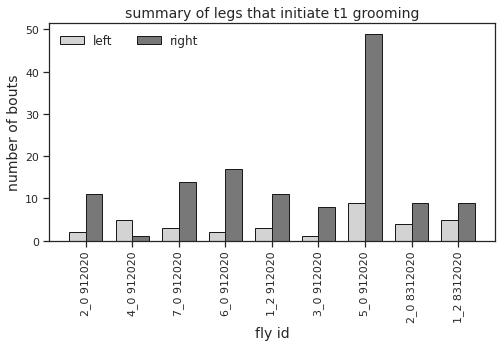

In [29]:
bar_width = 0.36
x_left = np.arange(len(fly_names))
x_right = np.array([x + bar_width for x in x_left]) 
x = (x_left + x_right)/2

fig, ax = plt.subplots(1, 1, figsize = (8, 4))    
ax.bar(x_left, n_left, capsize = 4, color='#d3d3d3', width = bar_width, edgecolor='k', label='left')
ax.bar(x_right, n_right, capsize = 4, color='#787878', width = bar_width, edgecolor='k', label='right')
ax.set_xticks([x + bar_width/2 for x in range(len(fly_names))])
ax.set_xticklabels(fly_names, rotation = 90)
ax.set_title('summary of legs that initiate t1 grooming', fontsize = 14)
ax.set_ylabel('number of bouts', fontsize = 14)
ax.set_xlabel('fly id', fontsize = 14)
ax.legend(ncol = 2, framealpha = 0, loc = 'upper left', fontsize=12)
 
# plt.savefig(os.path.join(out_path, 'handnedness_counts.png'), dpi = 400)
plt.subplots_adjust(hspace = 0.3)
plt.show()

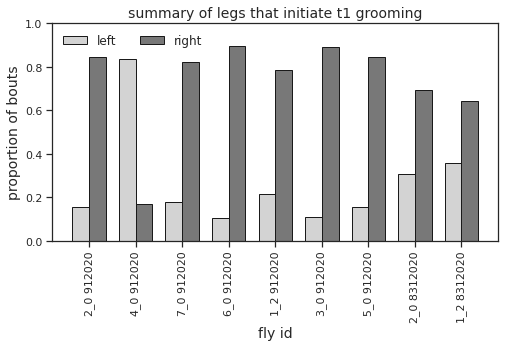

In [30]:
bar_width = 0.36
x_left = np.arange(len(fly_names))
x_right = np.array([x + bar_width for x in x_left]) 
x = (x_left + x_right)/2

fig, ax = plt.subplots(1, 1, figsize = (8, 4))    
ax.bar(x_left, n_left / (n_left + n_right), capsize = 4, color='#d3d3d3', width = bar_width, edgecolor='k', label='left')
ax.bar(x_right, n_right / (n_left + n_right), capsize = 4, color='#787878', width = bar_width, edgecolor='k', label='right')
ax.set_xticks([x + bar_width/2 for x in range(len(fly_names))])
ax.set_xticklabels(fly_names, rotation = 90)
ax.set_title('summary of legs that initiate t1 grooming', fontsize = 14)
ax.set_ylabel('proportion of bouts', fontsize = 14)
ax.set_xlabel('fly id', fontsize = 14)
ax.set_ylim([0,1])
ax.legend(ncol = 2, framealpha = 0, loc = 'upper left', fontsize=12)
 
# plt.savefig(os.path.join(out_path, 'handnedness_props.png'), dpi = 400)
plt.subplots_adjust(hspace = 0.3)
plt.show()

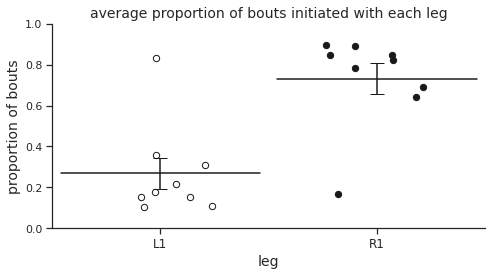

In [56]:
# plot variance for each angle type (scatter with means)
left_props = n_left / (n_left + n_right)
right_props = n_right / (n_left + n_right)
                         
fig = plt.figure(figsize = (7,4))
legs = ['L1', 'R1']
plt.title('average proportion of bouts initiated with each leg', fontsize = 14)
plt.xlabel('leg', fontsize = 14)
plt.xticks(ticks = np.arange(0.5, 2, 1), labels = legs, fontsize = 12)
plt.ylabel('proportion of bouts', fontsize = 14)
ax = plt.gca()
plt.ylim([0, 1])

n = 2
colors = ['w', 'k']
pos = np.arange(0.5, n + 0.5, 1)
props = [left_props, right_props]
for j in range(n):
    ax.errorbar(pos[j], np.nanmean(props[j]), yerr = stats.sem(props[j]), fmt = 'none', capsize = 7, color = 'k')
    k = j + 1
    sc = 0.5*np.random.rand(len(props[j])) - 0.75
    plt.scatter(np.ones(len(props[j])) + j + sc, props[j], s = 40, color = colors[j], edgecolor = 'k')
    x_b = j + 0.5
    x_t = (j + 1)
    ax.axhline(y = np.nanmean(props[j]), xmin = j/n + 0.02, xmax = k/n - 0.02, color = 'k')
    plt.xlim([0,n])

sns.despine()
plt.tight_layout()
plt.show()